#**LangChain**

LangChain is a framework for developing applications powered by language models.

- GitHub: https://github.com/hwchase17/langchain
- Docs: https://python.langchain.com/en/latest/index.html

### Overview:
- Installation
- LLMs
- Prompt Templates
- Chains
- Agents and Tools
- Memory
- Document Loaders
- Indexes

#**01: Installation**

In [3]:
!pip install langchain

#**02: Setup the Environment**

In [20]:
from google.colab import userdata
HUGGINGFACE_TOKEN=userdata.get('HUGGINGFACE_TOKEN')
HUGGINGFACEHUB_API_TOKEN=userdata.get('HUGGINGFACEHUB_API_TOKEN')
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')

##**03: Large Language Models**

The basic building block of LangChain is a Large Language Model which takes text as input and generates more text

Suppose we want to generate a company name based on the company description, so we will first initialize an OpenAI wrapper. In this case, since we want the output to be more random, we will intialize our model with high temprature.

The temperature parameter adjusts the randomness of the output. Higher values like 0.7 will make the output more random, while lower values like 0.2 will make it more focused and deterministic.

temperature value--> how creative we want our model to be

0 ---> temperature it means model is  very safe it is not taking any bets.

1 --> it will take risk it might generate wrong output but it is very creative

A generic interface for all LLMs. See all LLM providers: https://python.langchain.com/en/latest/modules/models/llms/integrations.html

#**Open AI**

#**Example 1**

In [5]:
!pip install openai

In [6]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.19
    Uninstalling langchain-core-0.3.19:
      Successfully uninstalled langchain-core-0.3.19
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.7
    Uninstalling langchain-0.3.7:
      Successfully uninstalled langchain-0.3.7


In [22]:
import os
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY
os.environ['HUGGINGFACE_TOKEN'] = HUGGINGFACE_TOKEN
os.environ['HUGGINGFACEHUB_API_TOKEN'] = HUGGINGFACEHUB_API_TOKEN

In [17]:
from langchain.llms import OpenAI
llm = OpenAI(temperature=0.9)

<ipython-input-17-6ad3029f0965>:2: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = OpenAI(temperature=0.9)


And now we will pass in text and get  predictions

In [12]:
text="What would be a good company name for a company that makes colorful socks?"

In [13]:
print(llm.predict(text))



"Rainbow Threads" or "Vivid Socks Co."


In [14]:
print(llm(text))

<ipython-input-14-605043303f29>:1: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  print(llm(text))




"Rainbow Threads" 



In [15]:
print(llm.invoke(text))



Rainbow Threads Co.


#**Example 2**

In [18]:
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.9)
name = llm.predict("I want to open a restaurant for Chinese food. Suggest a fency name for this.")
print(name)

<ipython-input-18-737d2f018a3c>:4: LangChainDeprecationWarning: The method `BaseLLM.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  name = llm.predict("I want to open a restaurant for Chinese food. Suggest a fency name for this.")




"Imperial Dragon Palace"


In [18]:
response=llm("I want to open a restaurant for KERALA food. Suggest a fency name for this.")
print(response)



"Spice Haven: A Taste of Kerala"


#**Hugging Face**

#**Example 1**

In [1]:
!pip install huggingface_hub

In [14]:
from langchain import HuggingFaceHub

In [23]:
# https://huggingface.co/google/flan-t5-xl
llm = HuggingFaceHub(repo_id="google/flan-t5-large", model_kwargs={"temperature":0, "max_length":64})

llm("translate English to German: How old are you?")

<ipython-input-23-f3eabfae036f>:4: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  llm("translate English to German: How old are you?")


'Wie alte sind Sie?'

#**Example 2**

In [25]:
from langchain import HuggingFaceHub

llm = HuggingFaceHub(repo_id="google/flan-t5-large", model_kwargs={"temperature":0, "max_length":64})
name = llm.predict("I want to open a restaurant for Italian food. Suggest a fency name for this.")
print(name)

i want to open a restaurant for Italian food


##**04: Prompt Templates**

Currently in the above applications we are writing an entire prompt, if you are creating a user directed application then this is not an ideal case

LangChain faciliates prompt management and optimization.

Normally when you use an LLM in an application, you are not sending user input directly to the LLM. Instead, you need to take the user input and construct a prompt, and only then send that to the LLM.

In many Large Language Model applications we donot pass the user input directly to the Large Language Model, we add the user input to a large piece of text called prompt template

#**Example 1**

In [28]:
from langchain.prompts import PromptTemplate
llm = OpenAI(temperature=0.9)

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)
p = prompt_template_name.format(cuisine="Indian")
print(p)

I want to open a restaurant for Indian food. Suggest a fency name for this.


#**Example 2**

In [27]:
from langchain.prompts import PromptTemplate
prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}")
prompt.format(product="colorful socks")

'What is a good name for a company that makes colorful socks'

##**05: Chains**

Combine LLMs and Prompts in multi-step workflows

Now as we have the  **model**:


  llm = OpenAI(temperature=0.9)


and the **Prompt Template**:

prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}")


prompt.format(product="colorful socks")


Now using Chains we will link together model and the PromptTemplate and other Chains

The simplest and most common type of Chain is LLMChain, which passes the input first to Prompt Template and then to Large Language Model

LLMChain is responsible to execute the PromptTemplate, For every PromptTemplate we will specifically have an LLMChain

#**Example 1**

In [29]:
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.9)

In [30]:
from langchain.prompts import PromptTemplate
prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}")
prompt.format(product="colorful socks")

'What is a good name for a company that makes colorful socks'

Whatever input text i am giving that will get assigned to this particular variable that is **product**

In [31]:
from langchain.chains import LLMChain

chain = LLMChain(llm=llm, prompt=prompt)
response= chain.run("colorful socks")
print(response)

<ipython-input-31-53b3d4db0968>:3: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=prompt)
<ipython-input-31-53b3d4db0968>:4: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response= chain.run("colorful socks")




"Rainbow Threads Co."


#**Example 2**

In [32]:
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.9)

In [33]:
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

In [35]:
from langchain.chains import LLMChain

chain = LLMChain(llm=llm, prompt=prompt_template_name)
response=chain.run("French")
print(response)



"Le Château de Cuisine"


In [36]:
chain = LLMChain(llm=llm, prompt=prompt_template_name, verbose=True)
response=chain.run("Mexican")
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
I want to open a restaurant for Mexican food. Suggest a fency name for this.

> Finished chain.
 

"La Fiesta Mexicana" 


**Can we combine Multiple PromptTemplates, We will try to combine Multiple PromptTemplates**

**The output from the first PromptTemplate is passed to the next PromptTemplate as input**

#**To comine the Chain and  to set a sequence for that we use SimpleSequentialChain**

##**Simple Sequential Chain**

In [37]:
llm = OpenAI(temperature=0.6)

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

name_chain =LLMChain(llm=llm, prompt=prompt_template_name)

prompt_template_items = PromptTemplate(
    input_variables = ['restaurant_name'],
    template="""Suggest some menu items for {restaurant_name}"""
)

food_items_chain = LLMChain(llm=llm, prompt=prompt_template_items)

In [38]:
from langchain.chains import SimpleSequentialChain
chain = SimpleSequentialChain(chains = [name_chain, food_items_chain])

content = chain.run("indian")
print(content)

 

1. Tandoori Chicken: Marinated chicken cooked in a clay oven with a blend of spices.

2. Lamb Vindaloo: Tender lamb cooked in a spicy tomato and vinegar-based sauce.

3. Vegetable Samosas: Crispy pastry filled with spiced potatoes, peas, and carrots.

4. Butter Chicken: Grilled chicken in a creamy tomato and butter sauce.

5. Aloo Gobi: Cauliflower and potato curry with cumin, turmeric, and other spices.

6. Chicken Tikka Masala: Grilled chicken in a rich and flavorful tomato-based sauce.

7. Chana Masala: Chickpeas cooked with onions, tomatoes, and aromatic spices.

8. Palak Paneer: Spinach and cottage cheese cooked in a creamy tomato sauce.

9. Biryani: Fragrant basmati rice cooked with spices, herbs, and your choice of chicken, lamb, or vegetables.

10. Naan Bread: Traditional Indian flatbread cooked in a tandoor oven.

11. Mango Lassi: A refreshing yogurt-based drink with mango puree and spices.

12. Gulab Jamun: Sweet and syrupy milk dumplings flavored with cardamom and rose wa

**There is a issue with SimpleSequentialChain it only shows last input information**

#**To show the entire information i will use SequentialChain**

##**Sequential Chain**

In [39]:
llm = OpenAI(temperature=0.7)

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

name_chain =LLMChain(llm=llm, prompt=prompt_template_name, output_key="restaurant_name")

In [40]:
llm = OpenAI(temperature=0.7)

prompt_template_items = PromptTemplate(
    input_variables = ['restaurant_name'],
    template="Suggest some menu items for {restaurant_name}."
)

food_items_chain =LLMChain(llm=llm, prompt=prompt_template_items, output_key="menu_items")

In [41]:
from langchain.chains import SequentialChain

chain = SequentialChain(
    chains = [name_chain, food_items_chain],
    input_variables = ['cuisine'],
    output_variables = ['restaurant_name', "menu_items"]
)

In [42]:
print(chain({"cuisine": "indian"}))

<ipython-input-42-33865b5de443>:1: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  print(chain({"cuisine": "indian"}))


{'cuisine': 'indian', 'restaurant_name': '\n\n"Spice Palace"', 'menu_items': '\n\n1. Chicken Tikka Masala\n2. Lamb Vindaloo\n3. Vegetable Biryani\n4. Samosas (vegetable or meat)\n5. Tandoori Shrimp\n6. Palak Paneer (spinach and cottage cheese curry)\n7. Chicken Korma\n8. Garlic Naan\n9. Mango Lassi\n10. Chana Masala (chickpea curry)\n11. Aloo Gobi (potato and cauliflower curry)\n12. Chicken Saag (chicken and spinach curry)\n13. Onion Bhaji (deep-fried onion fritters)\n14. Malai Kofta (vegetable and paneer balls in creamy sauce)\n15. Gulab Jamun (deep-fried milk balls in syrup)'}


##**06. Agents and Tools**

Agents involve an LLM making decisions about which Actions to take, taking that Action, seeing an Observation, and repeating that until done.


When used correctly agents can be extremely powerful. In order to load agents, you should understand the following concepts:

- Tool: A function that performs a specific duty. This can be things like: Google Search, Database lookup, Python REPL, other chains.
- LLM: The language model powering the agent.
- Agent: The agent to use.


Agent is a very powerful concept in LangChain

For example I have to travel from Dubai to Canada, I type this in ChatGPT



---> Give me  two flight options from Dubai to Canada on September 1, 2023 | ChatGPT will not be able to answer because has knowledge till
September 2021



ChatGPT plus has Expedia Plugin, if we enable this plugin it will go to Expedia Plugin and will try to pull information about Flights & it will show the information

#**What exactly happens when we try to enable this plugin**

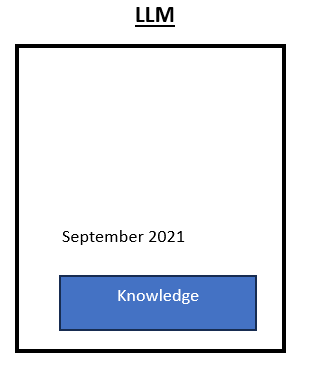

When we think about LLM. Many people think that it is just a knowledge engine, it has knowledge and it will try to give answer based on that knowledge but the knowledge is only limited to September 2021. The think that most people missout is that Large Lanaguage Model has a reasoning engine, and using that reasoning engine it can figure out when someone types this type of Question


Give me  two flight options from Dubai to Canada on September 1, 2023


As a human we go to Expedia as we have a reasoning engine in our brain.

LLM has a reasoning engine as well, so it will figure out the Source, Destination, Date and it will call Expedia Plugin and it will return response back.

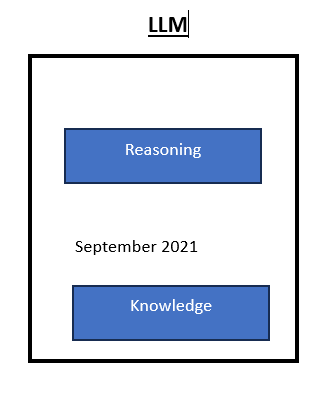

#**How much is US GDP in 2022? plus 5**





As LLM has a reasoning engine to answer that question it will go to Google Search Tool, it will find that answer and then it will use Math Tool and do plus 5

**An agent has access to a suite of tools, and determines which ones to use depending on the user input.**

#Agent will conenct with external tools and it will use LLM reasoning capabilities

All the tools like Google Search Tool and Math Tool are available as part of LangChain and you can configure  agent, so agent is nothing but using all these tools and LLM reasoning capabilities to perform a given task  

#To access Google Search Results in Real Time we use serpapi

#### serpapi and llm-math tool

If you're using a text LLM, first try zero-shot-react-description, aka. the MRKL agent for LLMs.


If you're using a Chat Model, try chat-zero-shot-react-description, aka. the MRKL agent for Chat Models.


If you're using a Chat Model and want to use memory, try chat-conversational-react-description, the Conversational agent.


If you have a complex task that requires many steps and you're interested in experimenting with a new type of agent, try the Plan-and-Execute agent.

In [43]:
!pip install google-search-results


  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32009 sha256=520f38405de479b982427c9ad20ab28730dc616984acd7a8ec6eb52b0b040b9e
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results


SerpApi is a real-time API to access Google search results.

https://serpapi.com/

In [44]:
import os

os.environ['SERPAPI_API_KEY'] = '2d703a1989128b0459c7372e8cf8a300e4a9b5c8714614f73f35fad63506b9eb'

os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

In [45]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain.llms import OpenAI

llm = OpenAI(temperature=0)
#Google Search API
# The tools we'll give the Agent access to. Note that the 'llm-math' tool uses an LLM, so we need to pass that in.
tools = load_tools(["serpapi", "llm-math"], llm=llm)

# Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

# Let's test it out!
agent.run("What was the GDP of US in 2024?")

<ipython-input-45-0b10d12814b1>:10: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. See LangGraph documentation for more details: https://langchain-ai.github.io/langgraph/. Refer here for its pre-built ReAct agent: https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/
  agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)




> Entering new AgentExecutor chain...
 I should use a search engine to find the answer.
Action: Search
Action Input: "GDP of US in 2024"
Observation: Real gross domestic product (GDP) increased at an annual rate of 2.8 percent in the third quarter of 2024 (table 1), according to the "advance" estimate released by the U.S. Bureau of Economic Analysis. In the second quarter, real GDP increased 3.0 percent.
Thought: This information is helpful, but I need the specific number.
Action: Search
Action Input: "US GDP 2024"
Observation: Real gross domestic product (GDP) increased at an annual rate of 2.8 percent in the third quarter of 2024 (table 1), according to the "second" estimate released by the U.S. Bureau of Economic Analysis. In the second quarter, real GDP increased 3.0 percent.
Thought: I should use a calculator to calculate the percentage increase.
Action: Calculator
Action Input: 2.8, 3.0
Observation: Answer: 5.8
Thought: I now know the final answer.
Final Answer: The GDP of US i

'The GDP of US in 2024 increased by 5.8%.'

#### Wikipedia and llm-math tool

In [46]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=6c974fb6fde44fb665fdbe143453442de9d6373c11f252f225bbfe282a3e0581
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [47]:
# install this package: pip install wikipedia

# The tools we'll give the Agent access to. Note that the 'llm-math' tool uses an LLM, so we need to pass that in.
tools = load_tools(["wikipedia", "llm-math"], llm=llm)

# Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Let's test it out!
agent.run("In what year was the film Departed with Leopnardo Dicaprio released? What is this year raised to the 0.43 power?")



> Entering new AgentExecutor chain...
 I should use Wikipedia to find the release year of the film and then use the Calculator to raise it to the 0.43 power.
Action: wikipedia
Action Input: Departed film

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: The Departed
Summary: The Departed is a 2006 American epic crime thriller film directed by Martin Scorsese and written by William Monahan. It is both a remake of the 2002 Hong Kong film Infernal Affairs and also loosely based on the real-life Boston Winter Hill Gang; the character Colin Sullivan is based on the corrupt FBI agent John Connolly, while the character Frank Costello is based on Irish-American gangster and crime boss Whitey Bulger. The film stars Leonardo DiCaprio, Matt Damon, Jack Nicholson, and Mark Wahlberg, with Martin Sheen, Ray Winstone, Vera Farmiga, Alec Baldwin, Anthony Anderson and James Badge Dale in supporting roles.
The film takes place in Boston and the surrounding metro area, primarily in the South Boston neighborhood. Irish Mob boss Frank Costello (Nicholson) plants Colin Sullivan (Damon) as a spy within the Massachusetts State Police; simultaneously, the police assign undercover state trooper Billy Costigan (DiCaprio) to infiltrate Costel

'26.30281917656938'

##**07: Memory**

Chatbot application like ChatGPT, you will notice that it remember past information

In [48]:
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.9)

In [49]:
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

In [50]:
from langchain.chains import LLMChain

chain = LLMChain(llm=llm,prompt=prompt_template_name)
name = chain.run("Mexican")
print(name)



"El Jardín de Sabor" (The Garden of Flavor)


In [51]:
name = chain.run("Indian")
print(name)


"Spice Palace" 


In [52]:
chain.memory

In [53]:
type(chain.memory)

NoneType

##**ConversationBufferMemory**

We can attach memory to remember all previous conversation

In [54]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory()

chain = LLMChain(llm=llm, prompt=prompt_template_name, memory=memory)
name = chain.run("Mexican")
print(name)

<ipython-input-54-5d2479adeed0>:3: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()




"El Jardín del Sabor" (The Garden of Flavor)


In [55]:
name = chain.run("Arabic")
print(name)



Al-Arabian Nights Bistro


In [56]:
print(chain.memory.buffer)

Human: Mexican
AI: 

"El Jardín del Sabor" (The Garden of Flavor)
Human: Arabic
AI: 

Al-Arabian Nights Bistro


##**ConversationChain**

Conversation buffer memory goes growing endlessly

Just remember last 5 Conversation Chain

Just remember last 10-20 Conversation Chain

In [57]:
from langchain.chains import ConversationChain

convo = ConversationChain(llm=OpenAI(temperature=0.7))
print(convo.prompt.template)

The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:


<ipython-input-57-ffeb4aaf188e>:3: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html` instead.
  convo = ConversationChain(llm=OpenAI(temperature=0.7))


In [58]:
convo.run("Who won the first cricket world cup?")

" The first cricket world cup was won by the West Indies in 1975. They defeated Australia by 17 runs in the final match held at Lord's Cricket Ground in London. The West Indies team was led by Clive Lloyd and they had players such as Viv Richards, Gordon Greenidge, and Michael Holding on their team. The tournament was organized by the International Cricket Council (ICC) and it featured 8 teams, including England, Australia, Pakistan, and India."

In [59]:
convo.run("How much is 5+5?")

' 5+5 is equal to 10.'

In [60]:
convo.run("Who was the captain ofthe winning team?")

' The captain of the winning team, the West Indies, was Clive Lloyd. He was known for his strong leadership skills and strategic thinking on the field. He also had a successful batting career and is considered one of the greatest cricketers of all time.'

In [61]:
print(convo.memory.buffer)

Human: Who won the first cricket world cup?
AI:  The first cricket world cup was won by the West Indies in 1975. They defeated Australia by 17 runs in the final match held at Lord's Cricket Ground in London. The West Indies team was led by Clive Lloyd and they had players such as Viv Richards, Gordon Greenidge, and Michael Holding on their team. The tournament was organized by the International Cricket Council (ICC) and it featured 8 teams, including England, Australia, Pakistan, and India.
Human: How much is 5+5?
AI:  5+5 is equal to 10.
Human: Who was the captain ofthe winning team?
AI:  The captain of the winning team, the West Indies, was Clive Lloyd. He was known for his strong leadership skills and strategic thinking on the field. He also had a successful batting career and is considered one of the greatest cricketers of all time.


##**ConversationBufferWindowMemory**

In [62]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=1)

convo = ConversationChain(
    llm=OpenAI(temperature=0.7),
    memory=memory
)
convo.run("Who won the first cricket world cup?")

<ipython-input-62-9a0d45377e43>:3: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferWindowMemory(k=1)


' The first cricket world cup was held in 1975 and was won by the West Indies team. The final match was played between West Indies and Australia, and West Indies won by 17 runs.'

In [63]:
convo.run("How much is 5+5?")

'  5+5 is equal to 10.'

In [65]:
convo.run("Who was the captain of the winning team?")

' I do not have enough context to accurately answer that question. Can you provide more information about the winning team?'

In [64]:
print(convo.memory.buffer)

Human: How much is 5+5?
AI:   5+5 is equal to 10.
